# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`.  **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и полученные данные (подробности далее). 
* Если вы выполняете <b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">сложную часть</font></a></b>, то кроме `ipynb` прислать нужно также ноутбук, сконвертированный **в формате `html`**, который можно получить как `File -> Download as -> HTML`. **Внимательно проверьте, что plotly-графики в ней сохранились**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 80 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

В данном задании вам нужно проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>.

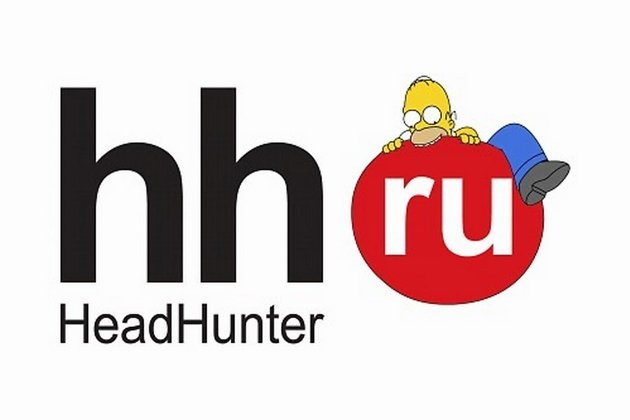

 ---
### Справка по работе с API.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [ ]:
data['items'][0]

Сколько всего найдено вакансий

In [5]:
data['found']

277

Количество страниц в результатах поиска

In [6]:
data['pages']

28

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [ ]:
df = pd.json_normalize(data['items'])
df.head(100)

Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [ ]:
vacancy_info

### <font color="blue"><i>Легкая часть</i></font>

##### ВАЖНЫЙ КОММЕНТАРИЙ:
    data_ex - таблица для DATA_SCIENCE
    data_ex_another - таблица для JAVA

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например `аналитик данных`.

In [ ]:
URL = 'https://api.hh.ru/vacancies'

# Названия возможоных профессий
text_templates = [
    "Data Scientist",
    "Data Analyst",
    "Data Engineer",
    "Data Architect",
    "Machine Learning Engineer",
    "Machine Learning Scientist",
    "Business Intelligence Developer",
    "Database Administrator",
    "Дата инженер",
    "Аналитик данных",
    "Big data"
]

first_name = True

# Параметр пагинации
ON_PAGE = 100

for name in text_templates:
    for page_number in range(0, 20):
        # Задаем параметры запроса
        params = {
            'text': name,
            'area': 1,
            'page': page_number,
            'per_page': ON_PAGE
        }
        
        # Запрос
        req = requests.get(URL, params)
        cur = json.loads(req.content.decode())
        
        # Выводим информацию про количество найденных вариантов
        if page_number == 0:
            number_of_found = cur['found']
            print('for ' + name + ' founded: ' + str(number_of_found))
    
        # Проверка пагинации, нужно ли парсить новую страницу
        if ON_PAGE * page_number > number_of_found:
            break
        
        print('    page_number: ' + str(page_number))
        
        # Текущий DataFrame
        cur_df = pd.json_normalize(cur['items'])

        # Обновляем DataFrame
        if first_name:
            data = cur_df
            first_name = False
        else:
            data = pd.concat([data, cur_df], ignore_index=True)

# Выводим итоговое количество вариантов (возможно с дубликатами)
print("result size (with duplicates): " + str(len(data)))

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

##### Комментарий:
    Надо также отфильтровать данные. Можно это делать по ключевым словам.

In [12]:
# Удалим дубликаты
data.drop_duplicates(subset=['id'], inplace=True, ignore_index = True)

print('size without duplicates: ' + str(len(data)))

# Удалим плохие названия профессий
bad_names = [
    "Java",
    "IOS",
    "Frontend",
    "Backend",
    "Android",
    "FullStack",
    "Full Stack",
    "C\+\+",
    "game",
    "junior",
    "администратор",
    "developer",
    "dba",
    "баз данных",
    "sales",
    "web",
    "веб",
    "market",
    "маркетолог",
    "продукт",
    "product",
    "digital",
    "маркетинг",
    "продаж",
    "разработчик"
]

# Приводим к нижнему регистру
data['name'] = data['name'].str.lower()

# Удаляем плохие имена вакансий
for bad in bad_names:
    bad = bad.lower()
    data = data[data.name.str.contains(bad) == False]

# Пересчитаем index
data = data.reset_index()
    
print('final size (without duplicates and wrong variants): ' + str(len(data)))

size without duplicates: 4609
final size (without duplicates and wrong variants): 3248


##### Комментарий:
    Убедимся, что данные правильно отфильтровались.

In [137]:
print(*list(data['name']), sep='\n')

data scientist
data scientist (cv+nlp)
data scientist (корпоративный бизнес)
data scientist в data accelerator (ml)
data scientist
data scientist
data scientist/ml engineer
data scientist
data engineer/ инженер по данным (удаленно)
data scientist / data analyst
data scientist
data scientist
data - инженер
data scientist (почта)
ведущий data scientist
аналитик/data scientist
data scientist
middle/senior data scientist
head of analytic/data scientist
data scientist
data scientist
middle data scientist (computer vision)
data scientist
data scientist
старший аналитик / data scientist
data engineer
data scientist
аналитик данных (data scientist)
senior data scientist (computer vision)
data engineer (удаленно)
data scientist
data scientist
it expert - data architect
data scientist (middle)
senior data scientist (antifraud)
data scientist
senior/middle data scientist
data scientist
data scientist (middle/senior)
data scientist
senior it professional - data analyst / technical analyst
data sci

аналитик
аналитик
аналитик sql
аналитик
стажер направления аналитика
аналитик данных
аналитик
аналитик данных- excel (анализ расходов)
младший аналитик / ассистент аналитика
аналитик
bi analyst
аналитик данных
бизнес-аналитик/финансовый аналитик
системный аналитик/бизнес-аналитик (стажер)
системный аналитик
аналитик
аналитик
аналитик данных
аналитик данных (sql)
аналитик
аналитик bi
бизнес-аналитик
аналитик данных службы исследований
it аналитик / бизнес-аналитик в отдел качества
аналитик данных в торговую компанию
аналитик данных (клиентский сервис)
аналитик
аналитик данных (e-commerce)
аналитик
аналитик sql
младший аналитик в команду поисковых систем сервиса путешествий
бизнес-аналитик (бизнес-ассистент с экспертным знанием excel)
e-commerce аналитик, удалённо
аналитик данных департамент развития информационных сервисов
аналитик системно-аналитического отдела
аналитик
аналитик
аналитик
аналитик bi
аналитик
аналитик бизнес-процессов
специалист / аналитик / стажер (практика организацио

Загрузите подробное описание каждой вакансии и создайте удобную таблицу данных.

In [ ]:
data_descr = []
for position in range(len(data)):
    vacancy = data['id'].iloc[position]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    
    # Выводим прогресс
    if position % 100 == 0:
        print((position + 1) / len(data))
    
    req = requests.get(vacancy_url)
    response = json.loads(req.content.decode())
    try:
        data_descr += [response]
    except Exception:
        print("failed")
        raise
        
data = data.merge(pd.json_normalize(data_descr), left_on='id', right_on='id', suffixes=[None, '_fictive'])
data.drop([x for x in data.columns if '_fictive' in x], axis=1, inplace=True)

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [15]:
safe_data_protect = data.copy()

# Удалим пустые столбцы
col_ = data.isna().sum()
to_delete_ = col_[col_ == len(data)].keys()
data = data.drop(columns=to_delete_)
print("Количество пустых столбцов: " + str(len(to_delete_)))

# Сохраним в формате xlsx
import openpyxl
data_ex = data.drop(columns='branded_description')
data_ex.to_excel("data_ex.xlsx")

Количество пустых столбцов: 15


**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [136]:
data = pd.read_excel('data_ex.xlsx')
print("Доступно вакансий: " + str(len(data)))

Доступно вакансий: 3248


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

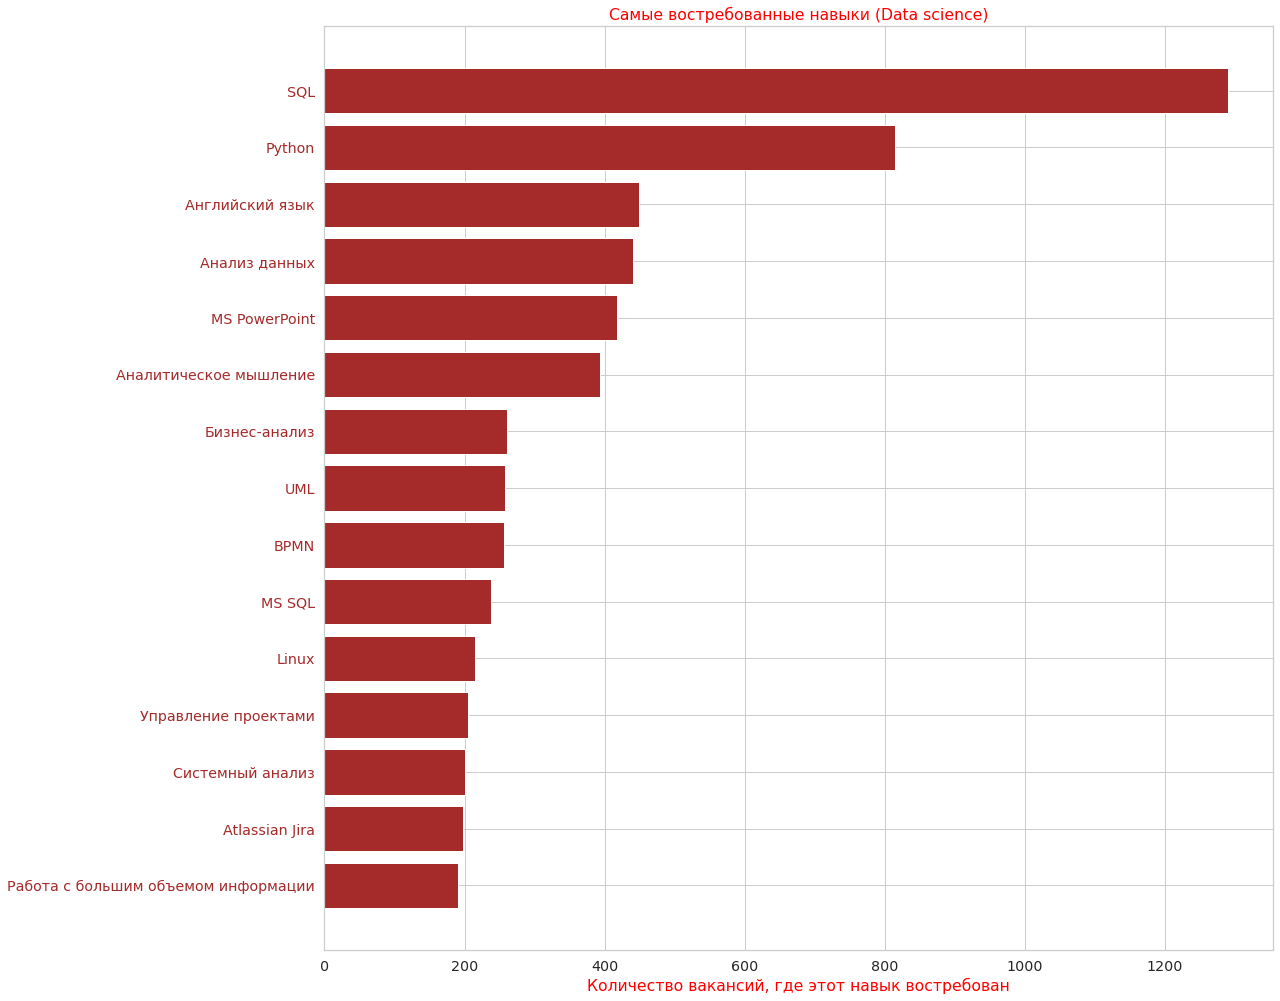

In [114]:
N = 15

count = dict()
array = list(data['key_skills'])

import ast
# Посчитаем частоту каждого скилла
for skill_array in array:
    normalized = ast.literal_eval(skill_array)
    for x in normalized:
        name = x['name']
        if (name not in count):
            count[name] = 1
        else:
            count[name] += 1        
        
# Отсортируем
count = sorted(count.items(), key=(lambda x: x[1]), reverse=True)

# Разобьем на части для графика
name = [x[0] for x in count]
number = [x[1] for x in count]

# Рисуем график
plt.figure(figsize=(17, 17))
axes = plt.axes()

axes.barh(np.arange(N), number[:N][::-1], color='brown');

axes.set_title("Самые востребованные навыки (Data science)", color='r');
axes.set_xlabel("Количество вакансий, где этот навык востребован", color='r')
axes.set_yticks(np.arange(N), labels=name[:N][::-1], color='brown')
plt.show()

##### Вывод:
    Видно, что самыми востребованными навыками для специалиста data-science являются SQL и python. Также важно знание MS PowerPoint, английского языка, умение аналитически мыслить, и знание анализа данных. Остальные навыки встречаются примерно в одинаковом количестве, заметно реже перечисленных. Оставшиеся навыки в основном представляют знания специализированных инструментов или знания общих вещей (linux, работа с большими объемами информации, и т.д.
   

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

Посмотрим, какая бывает валюта:
0     RUR
1     NaN
25    EUR
64    USD
Name: salary.currency, dtype: object


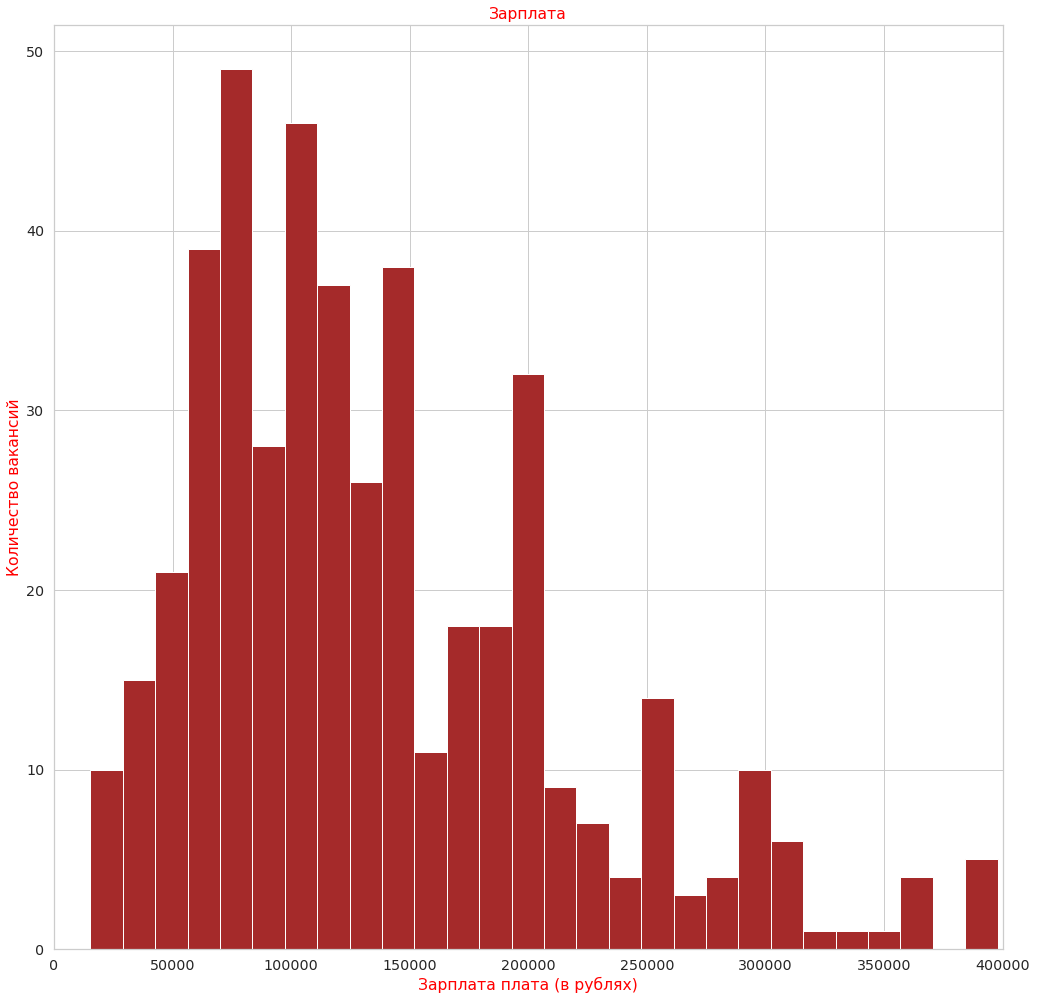

In [118]:
print("Посмотрим, какая бывает валюта:")
print(data['salary.currency'].drop_duplicates())

TAX = 0.87
IN_RUBLES = {'RUR': 1, 'EUR': 130, 'USD': 120}   

# Считаем зарплату с учетом валюты и налога
def calculate(x): 
    res = x['salary.from']
    res = res * IN_RUBLES[x['salary.currency']]
    if (x['salary.gross']):
        res = res * TAX
    return res

MAIN_COLUMNS = ['salary.currency', 'salary.from', 'salary.gross']
value = list(data.reindex(columns=MAIN_COLUMNS).dropna().apply(calculate, axis=1))

# Рисуем график
plt.figure(figsize=(17, 17))
axes = plt.axes()

axes.hist(value, bins=60, color='brown')
axes.set_xlim((0, 400000));

axes.set_ylabel('Количество вакансий', color='r')
axes.set_xlabel('Зарплата плата (в рублях)', color='r')

axes.set_title('Зарплата', color='r');

##### Вывод:
    В основном зарплата составляет от 50'000 до 200'000 рублей. Зарплата больше 200'000 встречается, но редко. Зарплата до 50'000 тоже встречается довольно редко.

##### Итог:
    После изучения данных стало понятно, какие навыки требуют работодатели. Критически важно знать python и     SQL, конечно, также важно знание анализа данных. Остальные навыки встречаются реже, они связаны с общими знаниями и знаниями инструментов для работы. Также из данных понятно, что в основном зарплата специалиста сферы data-science составляет от 50'000 до 200'000. Также встречаются как менее, так и более оплачиваемые вакансии, но уже заметно реже.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую.

##### Комментарий:
    Я решил проанализировать вакансии для Java-разработчика.

In [ ]:
# Проверим резервную копию
print(safe_data_protect.head(5))

# Решение будет таким же, так что copy-paste.
data = pd.DataFrame()

In [ ]:
URL = 'https://api.hh.ru/vacancies'

# Названия возможоных профессий
text_templates = [
    "Software Java",
    "Developer Java",
    "Frontend Java",
    "Backend Java",
    "Разработчик Java"
]

first_name = True

# Параметр пагинации
ON_PAGE = 100

for name in text_templates:
    for page_number in range(0, 20):
        # Задаем параметры запроса
        params = {
            'text': name,
            'area': 1,
            'page': page_number,
            'per_page': ON_PAGE
        }
        
        # Запрос
        req = requests.get(URL, params)
        cur = json.loads(req.content.decode())
        
        # Выводим информацию про количество найденных вариантов
        if page_number == 0:
            number_of_found = cur['found']
            print('for ' + name + ' founded: ' + str(number_of_found))
    
        # Проверка пагинации, нужно ли парсить новую страницу
        if ON_PAGE * page_number > number_of_found:
            break
        
        print('    page_number: ' + str(page_number))
        
        # Текущий DataFrame
        cur_df = pd.json_normalize(cur['items'])

        # Обновляем DataFrame
        if first_name:
            data = cur_df
            first_name = False
        else:
            data = pd.concat([data, cur_df], ignore_index=True)

# Выводим итоговое количество вариантов (возможно с дубликатами)
print("result size (with duplicates): " + str(len(data)))

##### Комментарий:
    Надо также отфильтровать данные. Можно это делать по ключевым словам.

In [22]:
# Удалим дубликаты
data.drop_duplicates(subset=['id'], inplace=True, ignore_index = True)

print('size without duplicates: ' + str(len(data)))

# Удалим плохие названия профессий
bad_names = [
    "js",
    "менеджер",
    "web",
    "scientist",
    "ruby",
    "анализ",
    "go",
    "data"
]

# Приводим к нижнему регистру
data['name'] = data['name'].str.lower()

# Удаляем плохие имена вакансий
for bad in bad_names:
    bad = bad.lower()
    data = data[data.name.str.contains(bad) == False]

# Пересчитаем index
data = data.reset_index()
    
print('final size (without duplicates and wrong variants): ' + str(len(data)))

size without duplicates: 2825
final size (without duplicates and wrong variants): 2642


##### Комментарий:
    Убедимся, что данные правильно отфильтровались.

In [139]:
print(*list(data['name']), sep='\n')

java developer — junior to middle (ученик)
java software performance testing engineer
senior java developer, aws (remote)
senior java разработчик
java developer
java-разработчик
full-stack software инженер - java
middle/senior java developer
разработчик java
senior java developer
java-разработчик
разработчик java
ведущий java-разработчик remote
java-разработчик
senior java-разработчик
java-разработчик
java разработчик (sber911)
senior qa engineer (senior software development engineer in test)
java developer
java-разработчик (мир)
разработчик java (junior/middle)
java-разработчик
java developer (с удаленным форматом работы)
java developer teamlead
senior java backend engineer
senior java backend developer
senior backend engineer (kotlin / java)
java-разработчик
java архитектор (software architect)
full stack developer (angular/java)
java developer
qa engineer (java)
frontend software engineer
qa automation engineer (remote)
java-разработчик
java-разработчик
java developer (гостех)
andro

android developer
android-developer (биометрия)
backend kotlin developer
android developer
android developer
head of qa (проект blockchain)
android-developer (виртуальный ассистент)
mobile qa automation (java)
android developer
разработчик мобильных приложений
qa automation engineer
android developer
senior java разработчик (расчеты и платежи)
java - разработчик (риски cib)
backend java developer (middle/senior) департамента развития информационных сервисов
разработчик java (образовательная цифровая платформа)
разработчик jira
frontend-разработчик
android developer
team lead backend / java
senior/middle java developer
android developer
senior developer
java - разработчик (проект - sberid)
devlead java (fintech)
android разработчик
senior java developer (cash management)
ios разработчик (бенч)
mobile qa automation (java)
архитектор java
java разработчик (проект "реклама" в одноклассниках)
senior backend developer (blockchain lab)
android developer / android-разработчик
ведущий инженер-р

In [ ]:
data_descr = []
for position in range(len(data)):
    vacancy = data['id'].iloc[position]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    
    # Выводим прогресс
    if position % 100 == 0:
        print((position + 1) / len(data))
    
    req = requests.get(vacancy_url)
    response = json.loads(req.content.decode())
    try:
        data_descr += [response]
    except Exception:
        print("failed")
        raise
        
data = data.merge(pd.json_normalize(data_descr), left_on='id', right_on='id', suffixes=[None, '_fictive'])
data.drop([x for x in data.columns if '_fictive' in x], axis=1, inplace=True)

In [25]:
safe_data_protect_another = data.copy()

# Удалим пустые столбцы
col_ = data.isna().sum()
to_delete_ = col_[col_ == len(data)].keys()
data = data.drop(columns=to_delete_)
print("Количество пустых столбцов: " + str(len(to_delete_)))

import openpyxl
data_ex = data.drop(columns='branded_description')
data_ex.to_excel("data_ex_another.xlsx")

Количество пустых столбцов: 15


In [138]:
data = pd.read_excel('data_ex_another.xlsx')
print("Доступно вакансий: " + str(len(data)))

Доступно вакансий: 2642


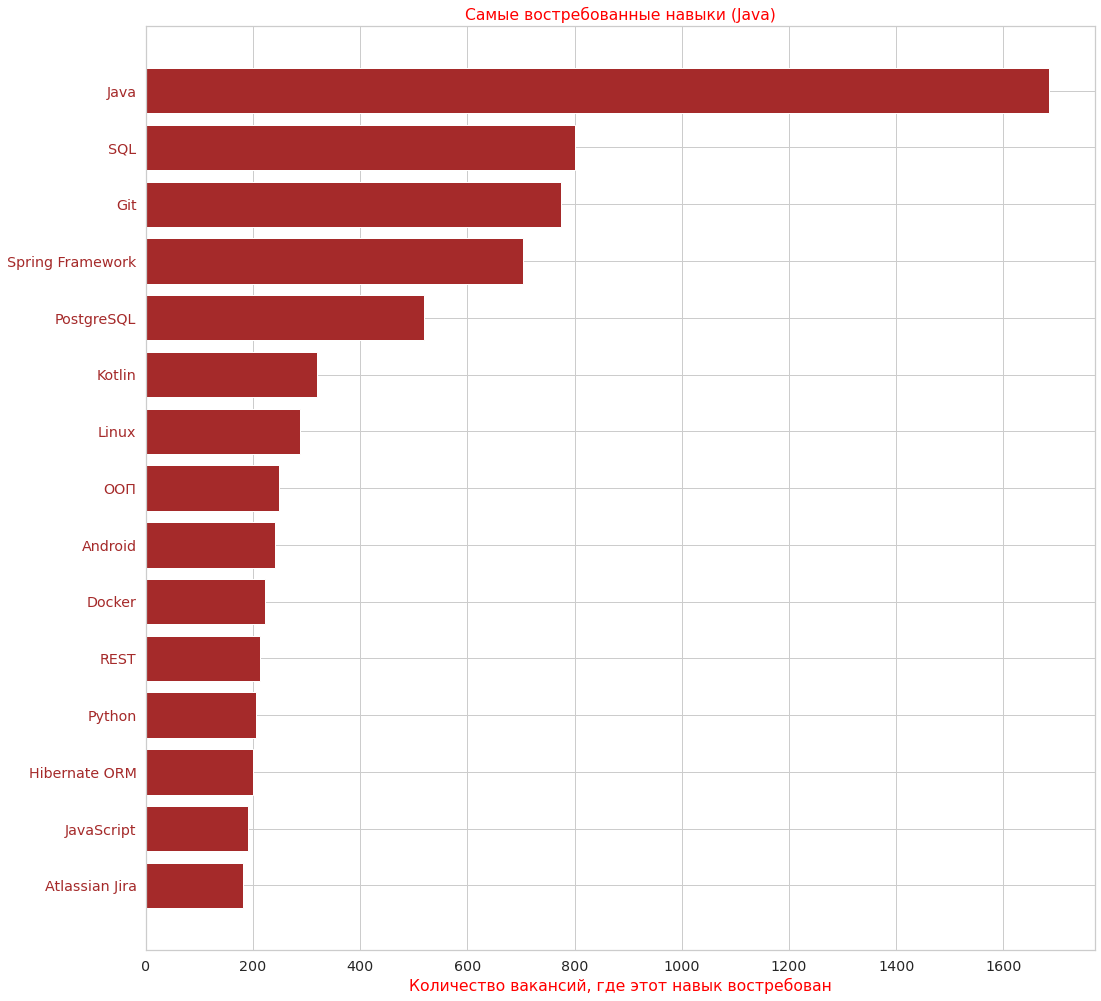

In [120]:
N = 15

count = dict()
array = list(data['key_skills'])

# Посчитаем частоту каждого скилла
for skill_array in array:
    normalized = ast.literal_eval(skill_array)
    for x in normalized:
        name = x['name']
        if (name not in count):
            count[name] = 1
        else:
            count[name] += 1        
        
# Отсортируем
count = sorted(count.items(), key=(lambda x: x[1]), reverse=True)

# Разобьем на части для графика
number = [x[1] for x in count]
name = [x[0] for x in count]

# Рисуем график
plt.figure(figsize=(17, 17))
axes = plt.axes()

axes.barh(np.arange(N), number[:N][::-1], color='brown');

axes.set_title("Самые востребованные навыки (Java)", color='r');
axes.set_xlabel("Количество вакансий, где этот навык востребован", color='r')
axes.set_yticks(np.arange(N), labels=name[:N][::-1], color='brown')
plt.show()

##### Вывод:
    Самым важным навыком является знание Java. Заметно реже, но довольно часто работодатели требуют знание SQL, фреймворка Spring, и знание git. Остальные навыки встречаются заметно реже перечисленных. Они связаны с знанием инструментов разработки (Docker...), а также других языков программирования (Python, Kotlin...), и, наконец, общие знания (linux, Android, ООП...).  

Посмотрим, какая бывает валюта:
0    RUR
2    USD
6    EUR
8    NaN
Name: salary.currency, dtype: object


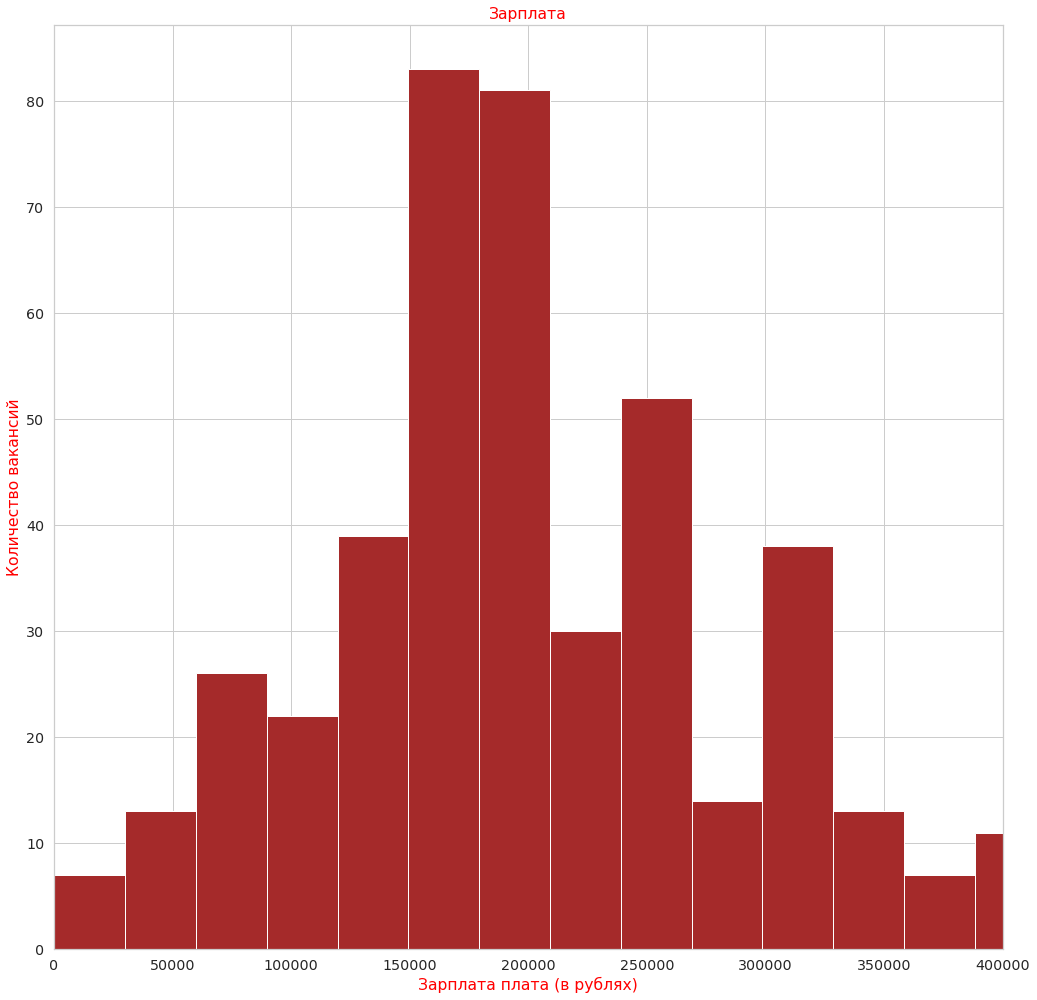

In [124]:
print("Посмотрим, какая бывает валюта:")
print(data['salary.currency'].drop_duplicates())

TAX = 0.87
IN_RUBLES = {'RUR': 1, 'EUR': 130, 'USD': 120}   

# Считаем зарплату с учетом валюты и налога
def calculate(x): 
    res = x['salary.from']
    res = res * IN_RUBLES[x['salary.currency']]
    if (x['salary.gross']):
        res = res * TAX
    return res

MAIN_COLUMNS = ['salary.currency', 'salary.from', 'salary.gross']
value = list(data.reindex(columns=MAIN_COLUMNS).dropna().apply(calculate, axis=1))

# Рисуем график
plt.figure(figsize=(17, 17))
axes = plt.axes()

axes.hist(value, bins=250, color='brown')
axes.set_xlim((0, 400000));

axes.set_ylabel('Количество вакансий', color='r')
axes.set_xlabel('Зарплата плата (в рублях)', color='r')

axes.set_title('Зарплата', color='r');

##### Вывод:
    Видно, что наиболее популярная зарплата - это 150'000 - 200'000 рублей. Доволно часто встречаются вакансии с большей зарплатой (популярны суммы в ~250'000 и ~300'000 рублей). Встречаются и менее оплачиваемые вакансии, но реже. 

##### Итог:
    После изучения данных стало понятно, какие навыки требуют работодатели. Критически важно знание Java. Следующая группа навыков - SQL, Spring, Git. Они встречаются заметно реже, но довольно часто. Остальные навыки встречаются реже, они связаны с общими знаниями, знаниями инструментов разработки и других языков программирования. Самая популрная зарплата Java-разработчика - от 150'000 до 200'000, иногда встречаются зарплаты больше (популярны ~250'000 и ~300'000), реже встречаются зарплаты меньше.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, для этого используйте библиотеку plotly. В частности, постройте распределений вакансий на карте.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="https://ru.wikipedia.org/wiki/Список_станций_Московского_метрополитена">внешние данные</a>.


##### Комментарий:
    Я выбрал анализ профессий в сфере data-science.

In [133]:
import plotly
import plotly.graph_objects as pgo
import plotly.express as pxss
import plotly.offline as poff

data = pd.read_excel('data_ex.xlsx') 

# Выведем возможные значения
print("Possible values: ", list(data['experience.name'].drop_duplicates().values))
 
# Опыт работы
foo = data.rename(columns={'experience.name': 'experience'})
foo['count'] = 1

# График
plt.figure(figsize=(17, 17))

figure_ = pxss.pie(foo, values='count', names='experience', 
                   color_discrete_sequence=pxss.colors.sequential.RdBu,
                   title="Required work experience", 
                   width=700,
                   height=700)
poff.iplot(figure_)

figure_.write_html('gra1.html')

Possible values:  ['От 3 до 6 лет', 'От 1 года до 3 лет', 'Нет опыта', 'Более 6 лет']


<Figure size 1224x1224 with 0 Axes>

##### Вывод:
    Есть 4 группы требований по опыту. Чаще всего (чуть более половины вакансий) требуется опыт от 1 до 3 лет работы. В других случаях чаще всего требуется опыт от 3 до 6 лет (около 35%). Остальные виды требований к опыту встречаются редко, оба примерно в 5% случаев - это либо требования к опыту более 6 лет, либо отсутствие каких-либо требований к опыту.

In [134]:
# Выведем работодателей в топе
TOP_N = 15

foo = data.groupby(by='employer.name').count()
foo = foo['id'].sort_values(ascending=False)

# Делим данные для графика
value = list(foo[:TOP_N].values)[::-1]
name = list(foo[:TOP_N].keys())[::-1]

bar_ = pgo.Bar(x=value, y=name, orientation='h')
figure_ = pgo.Figure(bar_)

figure_.update_layout(yaxis_title='name', xaxis_title='count', 
                      title_text=str('Top' + str(TOP_N) + ' employers'),
                      width=1000,
                      height=700)

figure_.update_traces(marker_color='brown')
poff.iplot(figure_)

figure_.write_html('gra2.html')

##### Вывод:
    Видно, что у сбербанка, относительно других компаний, очень много вакансий (160, в 3 раза больше, чем у второго места). Остальные же компании, начиная со второго места плавно распределяют значения в количестве вакансий от 60 до 20. Можно заметить, что среди компаний много банков.

In [135]:
# Изобразим на карте
METRO_COLUMNS = ['address.metro.lat', 'address.metro.lng', 'address.metro.station_name']
NEW_NAMES = ['широта', 'долгота', 'станция']

# Считаем количество вакансий
foo = data.groupby(by=METRO_COLUMNS).count()
foo = foo.rename(columns={'id': 'количество вакансий'})
foo = foo['количество вакансий']
foo = foo.reset_index()

# Делаем новые имена для графика
for i in range(3):
    foo = foo.rename(columns={METRO_COLUMNS[i]: NEW_NAMES[i]})

# Строим график
figure_ = pxss.scatter_mapbox(foo, lat=NEW_NAMES[0], lon=NEW_NAMES[1], text=NEW_NAMES[2], 
                        size='количество вакансий', 
                        hover_name=NEW_NAMES[2], hover_data=NEW_NAMES,
                        color_discrete_sequence=pxss.colors.sequential.RdBu, zoom=10, 
                        width=1000,
                        height=700)

figure_.update_layout(mapbox_style="open-street-map")
figure_.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
figure_.show()


figure_.write_html('gra3.html')

##### Вывод:
    Территориально вакансии есть всюду по Москве. Есть ветки метро, где их заметно больше: Технопарк, Выставочная-Деловой центр, Бауманская, Павелецкая, Белорусская, Водный стадион. В далеке от центра Москвы большинство вакансий сосредоточенно на Крылатской и в Румянцево.

Какие выводы можно сделать из построенных графиков?

<...>

##### Итог:
    В основном требуются сотрудники с опытом работы как минимум от 1 до 3 лет, либо от 3 до 6 лет (чуть реже). Наиболее много вакансий от сбербанка, и других банков. Среди топ 15 компаний выделяется сбербанк, у которого очень много вакансий (около 160), другие компании из топ 15 плавно разделяют количества вакансий от 60 до 20. Территориально вакансии присутствуют по всей Москве, есть ветки метро, где сосредоточены большинство вакансий. Если смотреть далеко от центра, то там есть две точки сосредоточения по количеству вакансий.